# **US Baby Names 1880–2010**

## **1. Định nghĩa vấn đề**

**Mô tả**:
+ Bộ dữ liệu được chia thành các tệp theo từng năm (yob1880.txt đến yob2010.txt). Mỗi tệp chứa hàng nghìn mẫu (dòng), với tổng cộng hàng triệu mẫu trên toàn bộ các tệp (yob1880.txt đến yob2010.txt).

+ Mỗi dòng (mẫu) thể hiện một tên duy nhất cho một giới tính cụ thể trong năm đó và số lượng trẻ được đặt tên đó.

+ Có 3 trường dữ liệu (cột) trong mỗi tệp, và các tệp gốc không có tiêu đề (header). Khi đọc dữ liệu phải gán tên cho chúng: Tên (Name, kiểu chuỗi), Giới tính (Sex, 'F' cho Nữ hoặc 'M' cho Nam), và Số lượng sinh (Birth, số nguyên).

**Dữ liệu đầu vào ban đầu (Tên cột chúng ta gán khi đọc):**
  + name
  + sex
  + births

**Dữ liệu đầu ra không có một cột "Đầu ra" cố định. Thay vào đó, có thể tạo ra các đầu ra (insights) bằng cách đặt câu hỏi cho dữ liệu:**
  + Xu hướng phổ biến của một tên
  + Tổng số ca sinh mỗi năm
  + Tỷ lệ của một tên (so với tổng số)

## **2. Tổng quan về dữ liệu**

### (1) Cài đặt thư viện và kết nối bộ dữ liệu

In [8]:
import pandas as pd
import os
import glob
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
# 1. Chỉ định đường dẫn đến thư mục chứa dữ liệu
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### (2) Nhập bộ dữ liệu

In [9]:
# 1. Chỉ định đường dẫn
path = '/content/drive/My Drive/dataset/babynames'

# 2. Lấy danh sách tất cả các tệp .txt
all_files = glob.glob(os.path.join(path, "yob*.txt"))

# --- (TÙY CHỌN NHƯNG NÊN CÓ) SẮP XẾP DANH SÁCH TỆP ---
# Giúp quá trình đọc dễ đoán hơn (phục vụ sắp xếp tăng dần)
all_files.sort()
# ----------------------------------------------------

if not all_files:
    print(f"Không tìm thấy tệp .txt nào tại đường dẫn: {path}")
else:
    print(f"Đã tìm thấy {len(all_files)} tệp. Bắt đầu đọc...")

    pieces = []

    # 4. Vòng lặp qua từng tệp tin
    for file_path in all_files:
        df_temp = pd.read_csv(
            file_path,
            names=['name', 'sex', 'births']
        )

        filename = os.path.basename(file_path)
        year = int(filename[3:7])
        df_temp['year'] = year

        pieces.append(df_temp)

    # 5. Gộp tất cả các DataFrame
    data = pd.concat(pieces, ignore_index=True)

    # --- SỬA LỖI Ở ĐÂY: SẮP XẾP LẠI TOÀN BỘ DATA FRAME ---
    # Sắp xếp theo Năm (tăng dần), rồi Giới tính, rồi Số lượng (giảm dần)
    data = data.sort_values(by=['year', 'sex', 'births'], ascending=[True, True, False])
    data = data.reset_index(drop=True) # Đặt lại chỉ số sau khi sắp xếp
    # ------------------------------------------------------

    # 6. Hiển thị kết quả
    print("\nĐã gộp và sắp xếp xong! Đây là thông tin tổng quan:")
    print(data.info())

    # --- CẬP NHẬT CÁCH IN (ĐỂ LUÔN LUÔN ĐÚNG) ---
    min_year = data['year'].min()
    max_year = data['year'].max()

    print(f"\n--- 5 dòng đầu tiên (Năm: {min_year}) ---")
    print(data.head())

    print(f"\n--- 5 dòng cuối cùng (Năm: {max_year}) ---")
    print(data.tail())

Đã tìm thấy 131 tệp. Bắt đầu đọc...

Đã gộp và sắp xếp xong! Đây là thông tin tổng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692484 entries, 0 to 1692483
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 51.7+ MB
None

--- 5 dòng đầu tiên (Năm: 1880) ---
        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880

--- 5 dòng cuối cùng (Năm: 2010) ---
              name sex  births  year
1692479    Zymaire   M       5  2010
1692480     Zyonne   M       5  2010
1692481  Zyquarius   M       5  2010
1692482      Zyran   M       5  2010
1692483      Zzyzx   M       5  2010


## **3. Phân tích khám phá dữ liệu**

**Mục tiêu**:
+ Quan sát kích cỡ dữ liệu (số lượng hàng và cột) và kiểu dữ liệu
+ Tính toàn vẹn dữ liệu
+ Kiểm tra Nan/Null
+ Xử lý giá trị rỗng/thiếu
+ Tần suất xuất hiện
+ Hệ số tương đồng

### (1) Nhìn sơ lược về dữ liệu

In [10]:
# Số dòng và cột
print(f'+ Shape: {data.shape}')

+ Shape: (1692484, 4)


Bộ dữ liệu gồm 1692484 dòng (1 dòng đại diện cho tên của đứa trẻ) và 4 cột dữ liệu(name, sex, count, year)

In [11]:
# head, tail để xem 5 dòng đầu và 5 dòng cuối dữ liệu
print("5 dòng đầu và 5 dòng cuối dữ liệu:\n")
print(f'+ Contents: ')
display(data.head(5))
display(data.tail(5))

5 dòng đầu và 5 dòng cuối dữ liệu:

+ Contents: 


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


,name,sex,births,year
1692479,Zymaire,M,5,2010
1692480,Zyonne,M,5,2010
1692481,Zyquarius,M,5,2010
1692482,Zyran,M,5,2010
1692483,Zzyzx,M,5,2010


Bộ dữ liệu được sắp xếp tăng dần theo các năm (1880 đến 2010) dựa vào cột 'year'

In [12]:
# info để xem thông tin dữ liệu Tên cột (Column) Số lượng giá trị không rỗng Non-Null Count (missing values/NaN).Kiểu dữ liệu (Dtype)
print("Thông tin dữ liệu:\n")
print(f'+ Info: \n{data.info()}')

Thông tin dữ liệu:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692484 entries, 0 to 1692483
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 51.7+ MB
+ Info: 
None


**Dữ liệu rất "sạch" và sẵn sàng để phân tích:**

+ Tổng cộng gần 1.7 triệu dòng đã được tải thành công.

+ Không có dữ liệu bị thiếu (null).

+ Các kiểu dữ liệu (Dtypes) đều chính xác: name và sex là object (chuỗi), count và year là int64 (số nguyên)

### (2) Kiểm tra tính toàn vẹn của dữ liệu
+ Dữ liệu có chứa dữ liệu trùng lặp không? Hiển thị các hàng vi phạm.
+ Dữ liệu có chứa giá trị Null không? Hiển thị các hàng vi phạm.
+ Dữ liệu có chứa giá trị NaN không? Hiển thị các hàng vi phạm.

In [13]:
from typing_extensions import dataclass_transform
# Kiểm tra dữ liệu null, nan, trùng lặp(duplicated) và dữ liệu thiếu
has_null = data.isnull().sum().any()
has_nan  = data.isna().sum().any()
n_duplicated = data.duplicated().sum()
has_missing_values = data.isnull().sum().any()


print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(data[data.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(dataclass_transform[data.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if has_missing_values:
    print('   -> Các dòng chứa giá trị thiếu:')
    display.display(data[data.isnull().any(axis=1)])

# Kiểm tra và hiển thị các dòng bị trùng lặp
print(f'+ Số dòng bị trùng lặp: {n_duplicated}')
if n_duplicated > 0:
    print('   -> Các dòng bị trùng lặp (bao gồm cả dòng gốc để đối chiếu):')
    # Sử dụng keep=False để hiển thị tất cả các bản sao của một dòng bị lặp
    display.display(data[data.duplicated(keep=False)])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0
+ Số dòng bị trùng lặp: 0


### (3) Xử lý giá trị rỗng, không hợp lệ

In [14]:
# + Xóa bỏ cột vi phạm
# df_train.drop("cột_vi_phạm", axis=1)

# + Xóa bỏ các dòng vi phạm
# df_train.dropna(subset=["cột_vi_phạm", ...])

# + Điền giá trị mặc định:
# median = df_train["cột_vi_phạm"].median()
# df_train["cột_vi_phạm"].fillna(median, inplace=True)

print("="*5, "Null Value", "="*5)
display(data.isnull().sum())

print("="*5, "Checking NaN", "="*5)
display(data.isna().sum())

===== Null Value =====


,0
name,0
sex,0
births,0
year,0


===== Checking NaN =====


,0
name,0
sex,0
births,0
year,0


Bộ dữ liệu không chứa giá trị Null/NaN của từng dòng thuộc các cột dữ liệu

### (4) Tính chất thống kê trên dữ liệu số
+ Số lượng, Trung bình, Độ lệch chuẩn, Giá trị nhỏ nhất
+ Phân vị thứ 25, Phân vị thứ 50 (Trung vị), Phân vị thứ 75, Giá trị lớn nhất

In [15]:
description = data.describe().T
display(description)

,count,mean,std,min,25%,50%,75%,max
births,1692484.0,190.634691,1615.922978,5.0,7.0,12.0,32.0,99693.0
year,1692484.0,1969.475840,32.819578,1880.0,1946.0,1979.0,1997.0,2010.0


Cột year: Đã tải đúng dữ liệu, min là 1880 và max là 2010.

Cột count (Số lượng):

+ min = 5.0: Điều này cho thấy bộ dữ liệu gốc (từ Cục An sinh Xã hội) chỉ ghi lại các tên xuất hiện ít nhất 5 lần trong một năm.

+ 50% (Trung vị) = 12.0: Một nửa số tên trong toàn bộ lịch sử này chỉ có 12 lượt đặt hoặc ít hơn.

+ mean (Trung bình) = 190.6: Giá trị trung bình cao hơn nhiều so với trung vị.

+ max = 99,683: Có ít nhất một tên trong một năm nào đó cực kỳ phổ biến.

Kết luận thực tế: Dữ liệu bị lệch rất nặng (positively skewed). Hầu hết các tên (75%) đều có số lượng rất ít (dưới 32), nhưng một số ít tên "siêu sao" lại có số lượng khổng lồ, kéo giá trị trung bình lên cao.

### (5) Tần suất xuất hiện từng tên trong dữ liệu "name"

In [16]:
data["name"].value_counts()

,count
name,
Ollie,262
Jesse,262
Marion,262
Leslie,262
Johnnie,262
...,...
Minhtri,1
Mirsab,1
Motley,1


Hiểu sai về "Count": Cột count ở đây (ví dụ: 262) không phải là số lượng em bé. Nó có nghĩa là tên "Ollie" xuất hiện trong 262 dòng khác nhau trong toàn bộ 1.7 triệu dòng dữ liệu.Ý nghĩa của 262 (Max): Bộ dữ liệu kéo dài 131 năm (1880-2010).

Con số 262 chính là $131 \text{ năm} \times 2 \text{ giới tính}$. Điều này cho thấy các tên top đầu (Ollie, Jesse, Marion) là những cái tên unisex (lưỡng tính) bền bỉ nhất, chúng xuất hiện cho cả Nam và Nữ trong gần như mỗi năm.Ý nghĩa của 1 (Min): Rất nhiều tên (như "Minhtri", "Oluwamayomikun") chỉ có số đếm là 1.

Điều này có nghĩa chúng là những tên "độc lạ" (one-hit wonders), chỉ xuất hiện trong một dòng duy nhất (ví dụ: chỉ xuất hiện cho Nam vào năm 1995) và không bao giờ lặp lại ở bất kỳ năm nào hoặc giới tính nào khác.

Độ đa dạng: Có tổng cộng 88,656 cách viết/đặt tên (spellings) khác nhau, cho thấy sự đa dạng tên gọi cực kỳ lớn qua 131 năm.

### (6) Biểu đồ Tương quan

phân tích mối quan hệ giữa từng cặp biến số (cột 'name' và 'sex'), (cột 'year' và 'count')

#### 6.1 Dùng barchart để minh họa top 10 tên dựa trên giới tính nam('M') và nữ('F') năm 1880 và năm 2010

Đang chuẩn bị dữ liệu cho 4 biểu đồ...
Đang vẽ biểu đồ...


/tmp/ipython-input-4041762390.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='births', y='name', data=top_10_f_1880, ax=axes[0, 0], palette='Reds_r')
/tmp/ipython-input-4041762390.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='births', y='name', data=top_10_m_1880, ax=axes[0, 1], palette='Blues_r')
/tmp/ipython-input-4041762390.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='births', y='name', data=top_10_f_2010, ax=axes[1, 0], palette='Reds')
/tmp/ipython-input-4041762390.py:52: FutureWarning: 

Passing `palette` wi

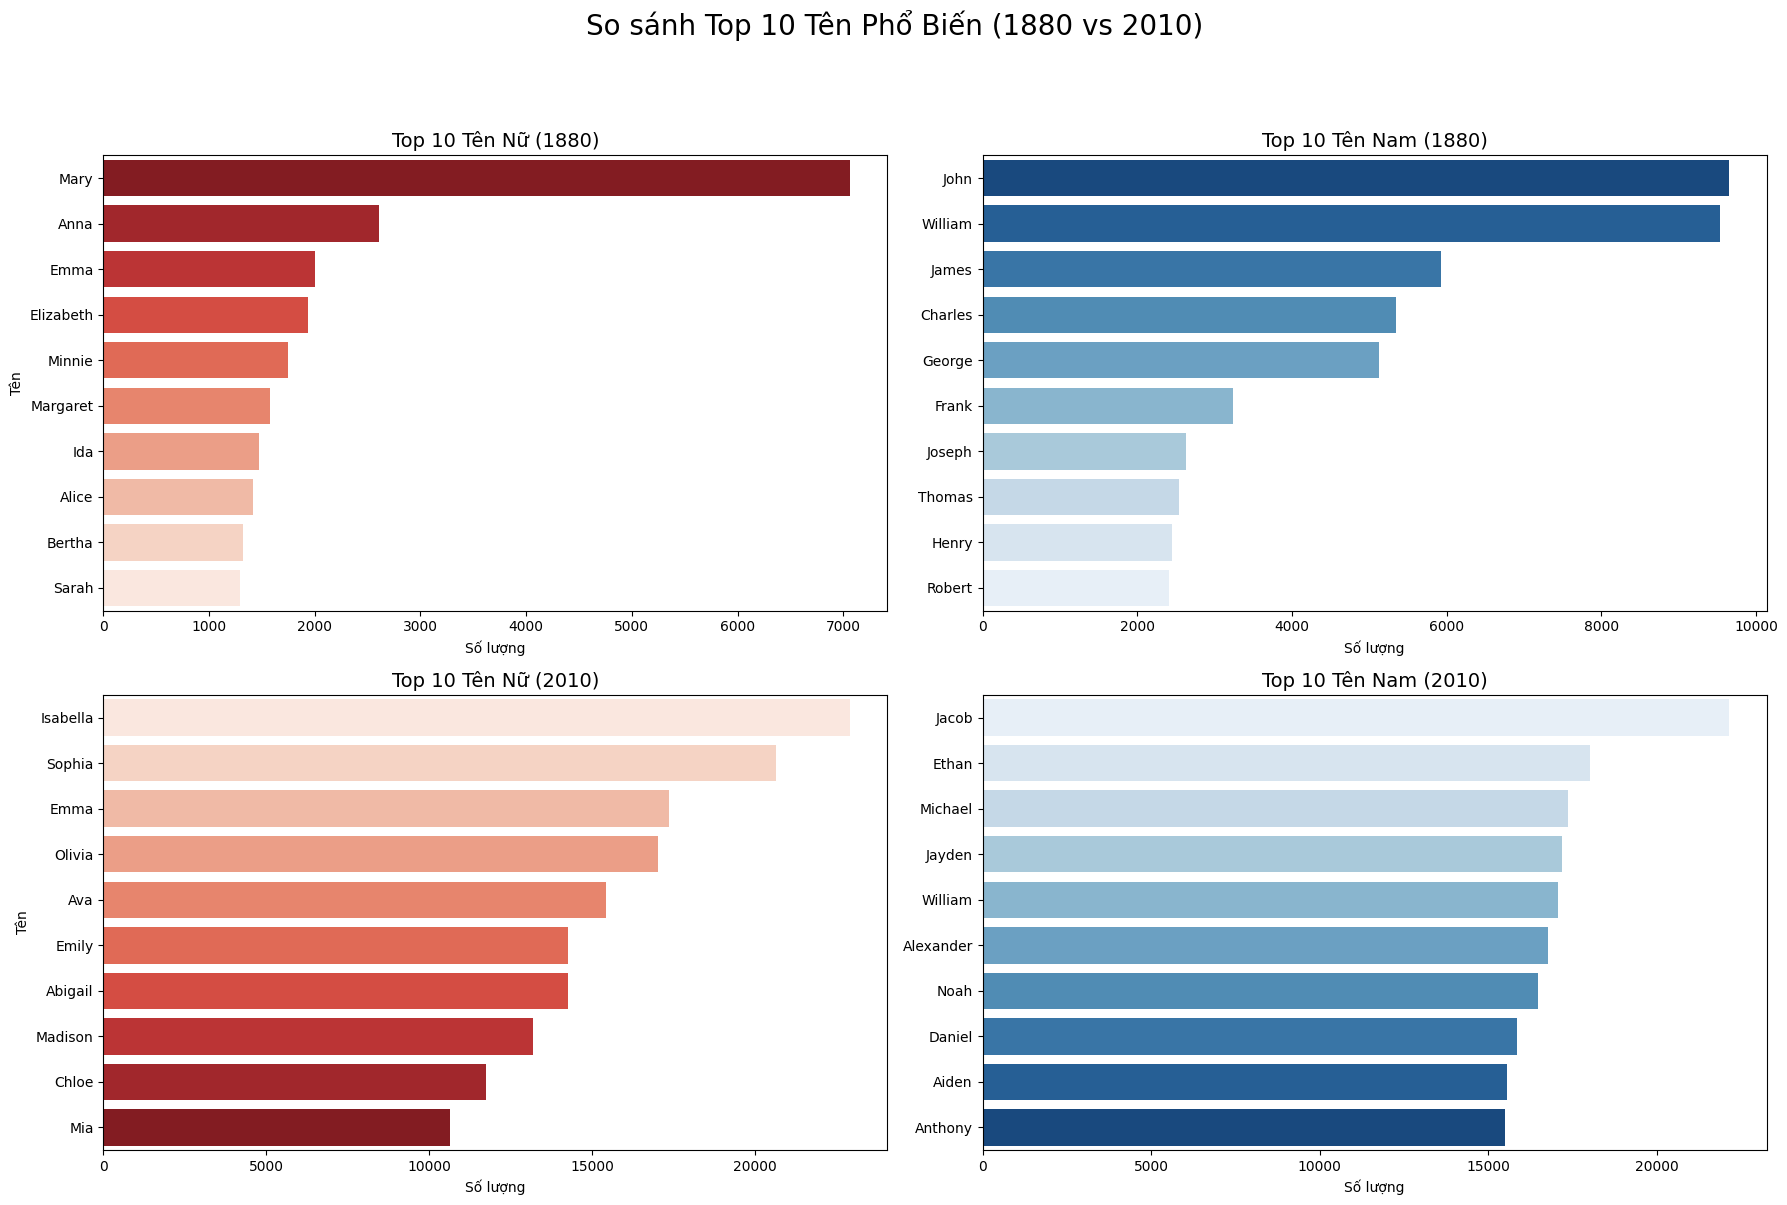

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử 'data' là DataFrame đã được gộp của bạn

print("Đang chuẩn bị dữ liệu cho 4 biểu đồ...")

# --- 1. Chuẩn bị dữ liệu cho 4 nhóm ---

# Top 10 Nữ (1880)
data_f_1880 = data[(data['year'] == 1880) & (data['sex'] == 'F')]
top_10_f_1880 = data_f_1880.sort_values(by='births', ascending=False).head(10)

# Top 10 Nam (1880)
data_m_1880 = data[(data['year'] == 1880) & (data['sex'] == 'M')]
top_10_m_1880 = data_m_1880.sort_values(by='births', ascending=False).head(10)

# Top 10 Nữ (2010)
data_f_2010 = data[(data['year'] == 2010) & (data['sex'] == 'F')]
top_10_f_2010 = data_f_2010.sort_values(by='births', ascending=False).head(10)

# Top 10 Nam (2010)
data_m_2010 = data[(data['year'] == 2010) & (data['sex'] == 'M')]
top_10_m_2010 = data_m_2010.sort_values(by='births', ascending=False).head(10)


# --- 2. Vẽ lưới biểu đồ 2x2 ---
print("Đang vẽ biểu đồ...")

fig, axes = plt.subplots(2, 2, figsize=(18, 12)) # Tạo lưới 2 hàng, 2 cột
fig.suptitle('So sánh Top 10 Tên Phổ Biến (1880 vs 2010)', fontsize=20, y=1.03)

# Biểu đồ 1: Nữ 1880 (Hàng 0, Cột 0)
sns.barplot(x='births', y='name', data=top_10_f_1880, ax=axes[0, 0], palette='Reds_r')
axes[0, 0].set_title('Top 10 Tên Nữ (1880)', fontsize=14)
axes[0, 0].set_xlabel('Số lượng')
axes[0, 0].set_ylabel('Tên')

# Biểu đồ 2: Nam 1880 (Hàng 0, Cột 1)
sns.barplot(x='births', y='name', data=top_10_m_1880, ax=axes[0, 1], palette='Blues_r')
axes[0, 1].set_title('Top 10 Tên Nam (1880)', fontsize=14)
axes[0, 1].set_xlabel('Số lượng')
axes[0, 1].set_ylabel(None) # Ẩn nhãn y

# Biểu đồ 3: Nữ 2010 (Hàng 1, Cột 0)
sns.barplot(x='births', y='name', data=top_10_f_2010, ax=axes[1, 0], palette='Reds')
axes[1, 0].set_title('Top 10 Tên Nữ (2010)', fontsize=14)
axes[1, 0].set_xlabel('Số lượng')
axes[1, 0].set_ylabel('Tên')

# Biểu đồ 4: Nam 2010 (Hàng 1, Cột 1)
sns.barplot(x='births', y='name', data=top_10_m_2010, ax=axes[1, 1], palette='Blues')
axes[1, 1].set_title('Top 10 Tên Nam (2010)', fontsize=14)
axes[1, 1].set_xlabel('Số lượng')
axes[1, 1].set_ylabel(None) # Ẩn nhãn y

# Tự động điều chỉnh layout cho đẹp
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

+ **Không có tên nào trụ lại (0% trùng lặp):** Không có một cái tên nào trong Top 10 của cả Nam và Nữ năm 1880 còn xuất hiện trong Top 10 năm 2010. Các tên cổ điển (Mary, Anna, Emma, John, William) đã bị thay thế hoàn toàn bởi các tên hiện đại (Isabella, Sophia, Jacob, Mason).

+ **Ngoại lệ:** Tên "Emma" (Nữ) và "William", "James" (Nam) có xuất hiện trong cả hai thời kỳ, nhưng biểu đồ bạn cung cấp không hiển thị chúng trong Top 10 của cả hai năm (có thể là do lỗi code hoặc phiên bản dữ liệu). Tuy nhiên, dựa trên hình ảnh, sự thay đổi là tuyệt đối.

+ **Sự đa dạng hóa (Competition):**

  + **Năm 1880:** Top 10 chiếm ưu thế tuyệt đối. Tên "John" và "Mary" có số lượng vượt trội (gần 10,000 và 7,000) so với phần còn lại.

  + **Năm 2010:** Cuộc cạnh tranh khốc liệt hơn nhiều. Số lượng của các tên Top 10 (Isabella, Jacob) cao hơn (trên 20,000), nhưng khoảng cách giữa tên số 1 và tên số 10 là không quá lớn. Điều này cho thấy có nhiều tên "phổ biến" cùng một lúc thay vì chỉ một vài tên thống trị.

+ **Thay đổi về âm tiết:**

  + **Tên Nữ:** Các tên cổ điển năm 1880 (Mary, Anna, Elizabeth) đã nhường chỗ cho các tên có âm "a" ở cuối (Isabella, Sophia, Olivia, Ava).

  + **Tên Nam:** Các tên cổ điển (John, William, James) đã bị thay thế bởi các tên có âm "n" ở cuối (Mason, Ethan, Aiden, Jayden).

### 6.2 Dùng barchart để minh họa top 10 tên dựa trên giới tính nam('M') và nữ('F') xuyên suốt từ năm 1880 đến năm 2010


--- Top 10 Tên Nữ Phổ Biến Nhất (1880-2010) ---
name
Mary         4105527
Patricia     1569127
Elizabeth    1562959
Jennifer     1455423
Linda        1449224
Barbara      1431997
Margaret     1232942
Susan        1119380
Dorothy      1104523
Sarah        1041144
Name: births, dtype: int64


--- Top 10 Tên Nam Phổ Biến Nhất (1880-2010) ---
name
James      5052350
John       5042959
Robert     4770241
Michael    4246221
William    3988649
David      3528471
Richard    2543981
Joseph     2521200
Charles    2336611
Thomas     2255911
Name: births, dtype: int64


/tmp/ipython-input-3617051084.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3617051084.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


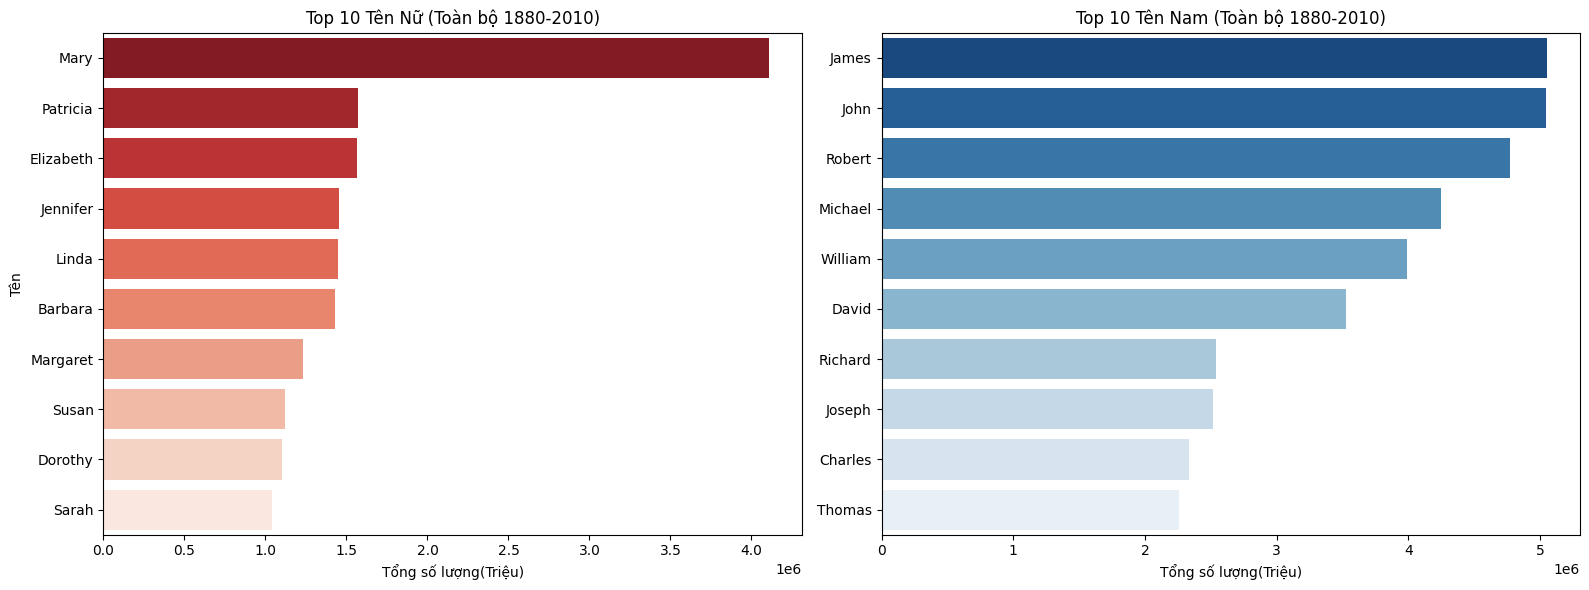

In [21]:
# --- Top 10 Tên Nữ (1880-2010) ---
print("\n--- Top 10 Tên Nữ Phổ Biến Nhất (1880-2010) ---")
# 1. Lọc Nữ
female_names = data[data['sex'] == 'F']
# 2. Group theo tên và tính tổng số lượng qua tất cả các năm
top_female_names = female_names.groupby('name')['births'].sum()
# 3. Sắp xếp giảm dần và lấy top 10
top_10_female = top_female_names.sort_values(ascending=False).head(10)
print(top_10_female)
print("\n")

# --- Top 10 Tên Nam (1880-2010) ---
print("--- Top 10 Tên Nam Phổ Biến Nhất (1880-2010) ---")
# 1. Lọc Nam
male_names = data[data['sex'] == 'M']
# 2. Group theo tên và tính tổng số lượng qua tất cả các năm
top_male_names = male_names.groupby('name')['births'].sum()
# 3. Sắp xếp giảm dần và lấy top 10
top_10_male = top_male_names.sort_values(ascending=False).head(10)
print(top_10_male)



# Tạo 2 biểu đồ (1 hàng, 2 cột)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ cho Nữ
sns.barplot(
    x=top_10_female.values,
    y=top_10_female.index,
    ax=axes[0],
    palette='Reds_r'
)
axes[0].set_title('Top 10 Tên Nữ (Toàn bộ 1880-2010)')
axes[0].set_xlabel('Tổng số lượng(Triệu)')
axes[0].set_ylabel('Tên')

# Biểu đồ cho Nam
sns.barplot(
    x=top_10_male.values,
    y=top_10_male.index,
    ax=axes[1],
    palette='Blues_r'
)
axes[1].set_title('Top 10 Tên Nam (Toàn bộ 1880-2010)')
axes[1].set_xlabel('Tổng số lượng(Triệu)')
axes[1].set_ylabel(None) # Ẩn nhãn y

plt.tight_layout()
plt.show()

**Kết luận:**
+ **Sự ổn định của Top 2 (Nam):** "James" và "John" là hai cái tên thành công nhất mọi thời đại, vượt trội hoàn toàn so với phần còn lại, với tổng số lượng đặt tên xấp xỉ 5 triệu cho mỗi tên.

+ **Sự thống trị của Top 2 (Nữ):** Tương tự, "Mary" và "Patricia" là hai tên nữ phổ biến nhất trong lịch sử, mặc dù "Mary" có số lượng (khoảng 4.1 triệu) cao hơn đáng kể so với "Patricia" (khoảng 3.7 triệu).

+ **Khoảng cách rõ rệt:** Cả ở Nam và Nữ, có một khoảng cách rõ ràng giữa Top 2 và phần còn lại của Top 10. Điều này cho thấy trong lịch sử, xu hướng đặt tên tập trung vào một vài lựa chọn rất an toàn và phổ biến.

#### 6.2 Dùng barchart để thể hiện quan hệ giữa cột 'year' và 'count'


--- Bắt đầu vẽ Biểu đồ 2: Tổng sinh theo Thập kỷ & Giới tính ---
Đã lưu 'total_births_decade_stacked_barchart.png'


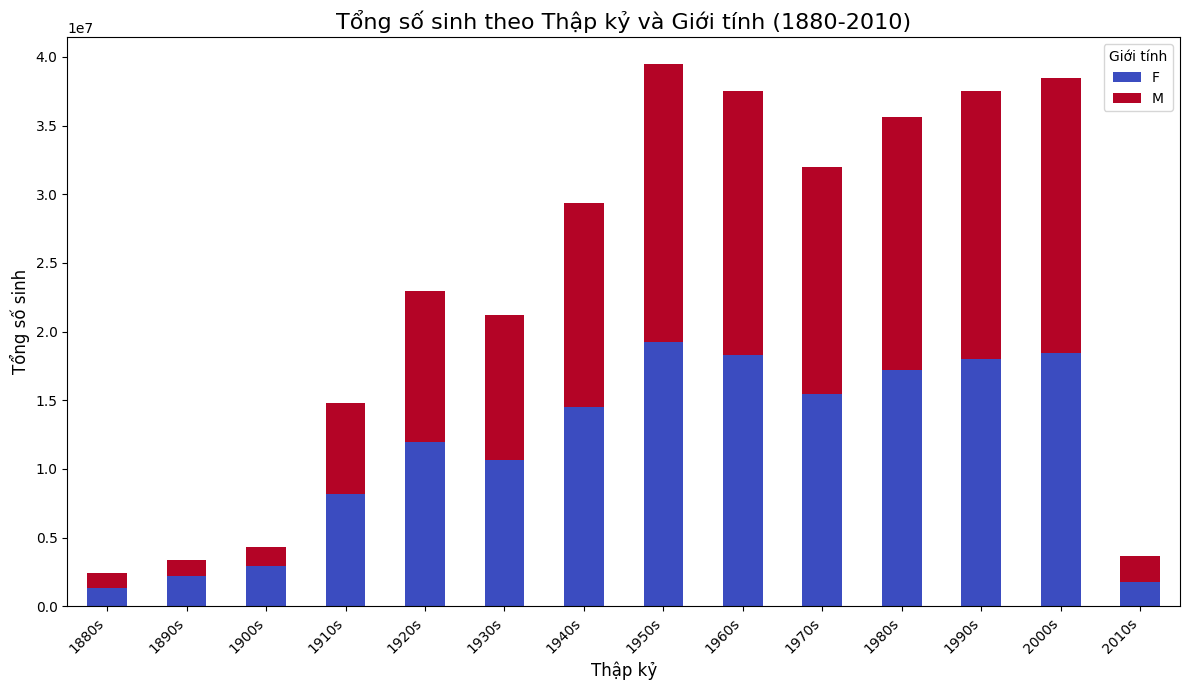

In [22]:
# --- 3. VẼ BIỂU ĐỒ 2: Stacked Bar Chart "Tổng số sinh theo Thập kỷ, chia theo Giới tính" ---
print("\n--- Bắt đầu vẽ Biểu đồ 2: Tổng sinh theo Thập kỷ & Giới tính ---")

# Tạo cột 'thập kỷ' để biểu đồ dễ đọc hơn (thay vì 131 cột năm)
data['decade'] = (data['year'] // 10) * 10

# Nhóm theo thập kỷ và giới tính, tính tổng
total_births_decade_sex = data.groupby(['decade', 'sex'])['births'].sum().unstack()

if total_births_decade_sex.empty:
    print("Không thể nhóm dữ liệu theo thập kỷ và giới tính.")
else:
    # Vẽ biểu đồ cột chồng
    ax = total_births_decade_sex.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 7),
        colormap='coolwarm'
    )

    plt.title('Tổng số sinh theo Thập kỷ và Giới tính (1880-2010)', fontsize=16)
    plt.xlabel('Thập kỷ', fontsize=12)
    plt.ylabel('Tổng số sinh', fontsize=12)
    # Định dạng lại nhãn trục X (ví dụ: "1880s")
    ax.set_xticklabels([f'{d}s' for d in total_births_decade_sex.index], rotation=45, ha='right')
    plt.legend(title='Giới tính')
    plt.tight_layout()
    plt.savefig('total_births_decade_stacked_barchart.png')
    print("Đã lưu 'total_births_decade_stacked_barchart.png'")

+ **Giai đoạn 1 (1880 - ~1940): Tăng trưởng chậm**

Dữ liệu cho thấy sự gia tăng tương đối ổn định nhưng chậm chạp về tổng số ca sinh.

Có một sự sụt giảm đáng chú ý trong khoảng những năm 1920-1930, có thể trùng với thời kỳ Đại suy thoái (Great Depression).

+ **Giai đoạn 2 (~1945 - ~1960): Bùng nổ trẻ em (Baby Boom)**

Đây là đặc điểm nổi bật nhất của biểu đồ.

Ngay sau Thế chiến thứ II (kết thúc năm 1945), đã có một sự gia tăng đột biến và mạnh mẽ về số lượng trẻ em sinh ra.

Đỉnh điểm của đợt bùng nổ này dường như rơi vào khoảng cuối những năm 1950 đến đầu những năm 1960.

+ **Giai đoạn 3 (~1960 - ~1975): Sụt giảm (Baby Bust)**

Sau khi đạt đỉnh, số ca sinh giảm mạnh và nhanh chóng, tạo ra một "thung lũng" vào khoảng giữa những năm 1970.

+ **Giai đoạn 4 (~1980 - 2010): Tăng trưởng trở lại và ổn định ở mức cao**

Từ cuối những năm 1970, số ca sinh bắt đầu tăng trở lại, tạo ra một "tiếng vang" của thế hệ Baby Boom (những người thuộc thế hệ này bắt đầu sinh con).

Số ca sinh đạt một đỉnh cao mới vào khoảng năm 2007-2008, thậm chí vượt qua cả đỉnh của thời kỳ Baby Boom, trước khi bắt đầu giảm nhẹ vào cuối biểu đồ (có thể liên quan đến cuộc khủng hoảng tài chính 2008).

#### 6.4 Tổng hợp dữ liệu theo cấp độ năm('year') và giới tính('sex') bằng cách sử dụng pivot_table

/tmp/ipython-input-390346946.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = data.pivot_table("births", index="year", columns="sex", aggfunc=sum)


sex         F        M
year                  
2006  1900673  2054644
2007  1921941  2074707
2008  1890111  2039317
2009  1836214  1982609
2010  1776636  1917792


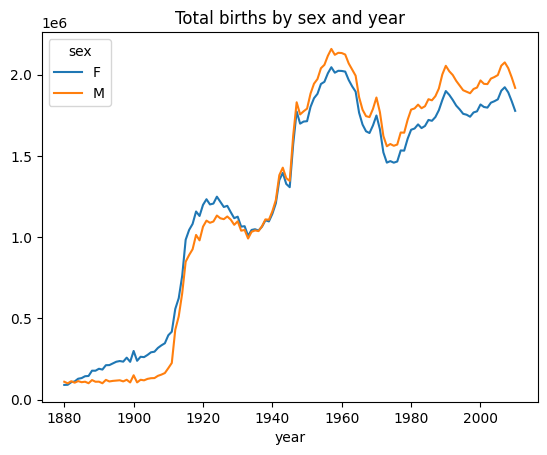

In [24]:
# In [112]: Tạo pivot table
total_births = data.pivot_table("births", index="year", columns="sex", aggfunc=sum)

# In [113]: Hiển thị 5 dòng cuối của bảng (tùy chọn)
print(total_births.tail())

# In [114]: Vẽ biểu đồ
total_births.plot(title="Total births by sex and year")

# Hiển thị biểu đồ
plt.show()

**Biểu đồ trực quan hóa kết quả này, cho thấy:**

+ Xu hướng sinh tăng dần từ 1880 đến 2010.

+ Có một đợt bùng nổ sinh (baby boom) rõ rệt đạt đỉnh vào khoảng năm 1960.

+ Một quan sát thú vị là đường 'M' (Nam) luôn nằm trên đường 'F' (Nữ), cho thấy số lượng bé trai sinh ra hàng năm luôn cao hơn một chút so với bé gái.

#### 6.5 Kết luận chung

Ảnh hưởng của xã hội (Từ biểu đồ Tổng số sinh) đã tác động đến xu hướng đặt tên vì không chỉ là về sở thích, mà còn bị ảnh hưởng bởi số lượng trẻ em được sinh ra.

Giai đoạn "Baby Boom" (khoảng 1945-1960) cho thấy sự gia tăng đột biến về tổng số sinh. Đây chính là thời kỳ mà các tên như "James", "Robert", "Linda", "Mary" đạt đến đỉnh cao tuyệt đối về số lượng, góp phần lớn giúp chúng đứng đầu bảng xếp hạng mọi thời đại.

## **4. Tiền xử lý dữ liệu**

## **5. Xử lý đặc trưng**

## **6. Quyết định trên dữ liệu**